In [8]:
import numpy as np
from multiprocessing import Pool
from timeit import default_timer as timer
from ddgclib._particle_liquid_bridge_flo import *
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ProcessPoolExecutor, as_completed
from multiprocessing import Manager




In [9]:



def fun_V_analytic(diameter, length):
    V_an = np.pi/4*diameter**2*length
    return V_an

def save_complex(HC,filename):
    for v in HC.V:
      #  print('---')
        v_new = []
        for i, vi in enumerate(v.x):
            #print(type(vi))
            v_new.append(float(vi))
            #v.x[i] = float(vi)
        HC.V.move(v, tuple(v_new))
        v.x_a = np.array(v.x_a, dtype='float')
        #v.x_a = v.x_a.astype(float)
        #for vi in v.x:
         #   print(type(vi))
    #print(type(v.x_a))
    HC.save_complex(fn = filename)

def fun_iterable_2( refinement, tau= 0.1, t_f=0, diameter=2, length = 1):
    gamma=0.0728
    #v_rel_list = []
    #time_list = []
    #print(f'refinement = {refinement}')

    starttime = timer()
    v_l         = 0 - length/2  # lower length-coordinate
    v_u         = 0 + length/2   # higher length-coordinate


   # dummy_parameter = fun_liquid_bridge(refinement,v_l=v_l, v_u=v_u,tau=tau, t_f = t_f,diameter = diameter, gamma = gamma)
    dummy_parameter = fun_liquid_bridge(v_l, v_u,tau, t_f,diameter, refinement,gamma)
    HC = dummy_parameter[0]
    '''
    Volume calculation
    '''
    V_num = 0
    for v in HC.V:
        V_ijk = volume(v)
        #print(V_ijk)
        V_num += np.sum(V_ijk)
    V_an = fun_V_analytic(diameter, length)
    V_num = V_num/12

    v_rel = ((V_an - V_num)/V_an)*100

    endtime = timer()

    print(f"Time elapsed: {endtime-starttime:.2f} s für refinement = {refinement}")
    print(f"Volume calculated: {V_num:.2f} m^3 für refinement = {refinement}")
    print(f"Volume deviation: {v_rel:.2f} % für refinement = {refinement}")

    v_rel_list.append(v_rel)
    time_list.append(endtime-starttime)
    print(v_rel_list)

    if 1:
        string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement) + 'openmesh'
        #save_name = 'Complex_tf5000_tau01_refinment3.json'
        save_name = 'Complex'+ string_savename + '.json'
    #    np.savetxt(string_savename + '_vrel'+ '.txt',v_rel_list)
    #    np.savetxt(string_savename + '_time'+ '.txt',time_list)
        save_complex(HC, save_name)

In [10]:
refinement_end = 6

diameter    = 2
length      = 1


In [11]:
refinement_list = np.arange(2,refinement_end+1,1)

gamma = 0.0728  # N/m, surface tension of water at 20 deg C

v_rel_list  = []
time_list   = []

for i in range(len(refinement_list)):
    refinement = refinement_list[i]
    #print(f'refinement = {refinement}')

    dummy_parameter = fun_iterable_2( refinement, tau= 0.1, t_f=0, diameter=diameter, length = length) # v_l, v_u, tau, tf, d


string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end) + 'openmesh'
np.savetxt(string_savename + '_vrel'+ '.txt',v_rel_list)
np.savetxt(string_savename + '_time'+ '.txt',time_list)
print(f'refinement = {refinement}')

Time elapsed: 0.06 s für refinement = 2
Volume calculated: 2.03 m^3 für refinement = 2
Volume deviation: 35.28 % für refinement = 2
[35.28056240195487]
Time elapsed: 0.34 s für refinement = 3
Volume calculated: 2.11 m^3 für refinement = 3
Volume deviation: 32.96 % für refinement = 3
[35.28056240195487, 32.958991864516086]
Time elapsed: 3.66 s für refinement = 4
Volume calculated: 2.11 m^3 für refinement = 4
Volume deviation: 32.87 % für refinement = 4
[35.28056240195487, 32.958991864516086, 32.87201600549729]
Time elapsed: 121.95 s für refinement = 5
Volume calculated: 2.10 m^3 für refinement = 5
Volume deviation: 33.04 % für refinement = 5
[35.28056240195487, 32.958991864516086, 32.87201600549729, 33.04196123107154]
Time elapsed: 1048.85 s für refinement = 6
Volume calculated: 2.10 m^3 für refinement = 6
Volume deviation: 33.17 % für refinement = 6
[35.28056240195487, 32.958991864516086, 32.87201600549729, 33.04196123107154, 33.17339231773509]
refinement = 6


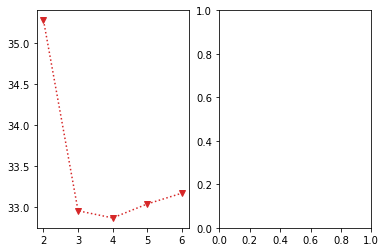

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

ax[0].plot(refinement_list, v_rel_list,  "v:",color="tab:red" )#,  linewidth = line_value, markersize = marker_value)